In [1]:
import io
import numpy as np
import pandas as pd
from tqdm import tqdm
import geopandas as gpd
from pathlib import Path
from itertools import permutations

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import pandas as pd
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'  # has wide Unicode support

# Modelling
from cf_plus_core import diagnose_inputs, CFPlus, CFPlusConfig, build_fit_predict, validation_curve_df, penalty_report_monthyear

# Base directories
BASE_DIR = Path("/Users/wenlanzhang/PycharmProjects/Mapineq/src/")
DATA_DIR = Path("/Users/wenlanzhang/Downloads/PhD_UCL/Data/Oxford")

# Load Data

In [2]:
pred_EU = pd.read_csv("/Users/wenlanzhang/PycharmProjects/Mapineq/src/case_study/Migration/Excess_migration/4plot/pred_CF_EU.csv") 
pred_LA = pd.read_csv("/Users/wenlanzhang/PycharmProjects/Mapineq/src/case_study/Migration/Excess_migration/4plot/pred_CF_LA.csv") 
pred_ALL = pd.read_csv("/Users/wenlanzhang/PycharmProjects/Mapineq/src/case_study/Migration/Excess_migration/4plot/pred_CF_ALL.csv") 

# Plot

## Different model 

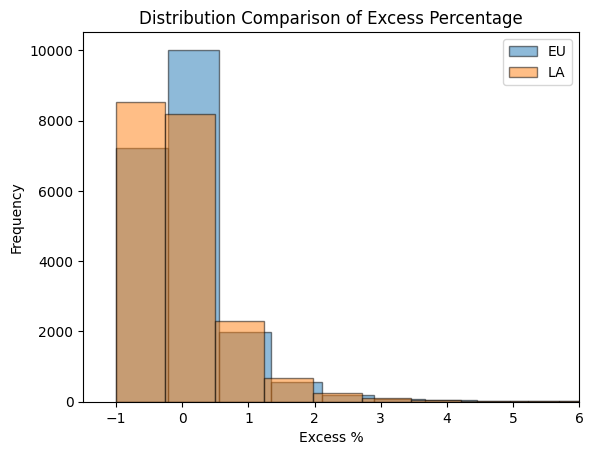

In [5]:
df1_plot = pred_EU.dropna(subset=["excess_pct"])
df2_plot = pred_LA.dropna(subset=["excess_pct"])

plt.hist(df1_plot["excess_pct"], bins=20, alpha=0.5, label="EU", edgecolor="black")
plt.hist(df2_plot["excess_pct"], bins=20, alpha=0.5, label="LA", edgecolor="black")

plt.xlabel("Excess %")
plt.ylabel("Frequency")
plt.title("Distribution Comparison of Excess Percentage")
plt.xlim(-1.5, 6)

plt.legend()
plt.show()

## Result 

### Global CF

In [3]:
from CF_result import (build_global_series, 
        plot_global_baseline_and_redistribution,
        plot_cumulative_excess,
        plot_topk_positive_excess)

pred = pred_ALL

/Users/wenlanzhang/PycharmProjects/Mapineq/src/case_study/Migration/Excess_migration/Prediction/CF_result.py:369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


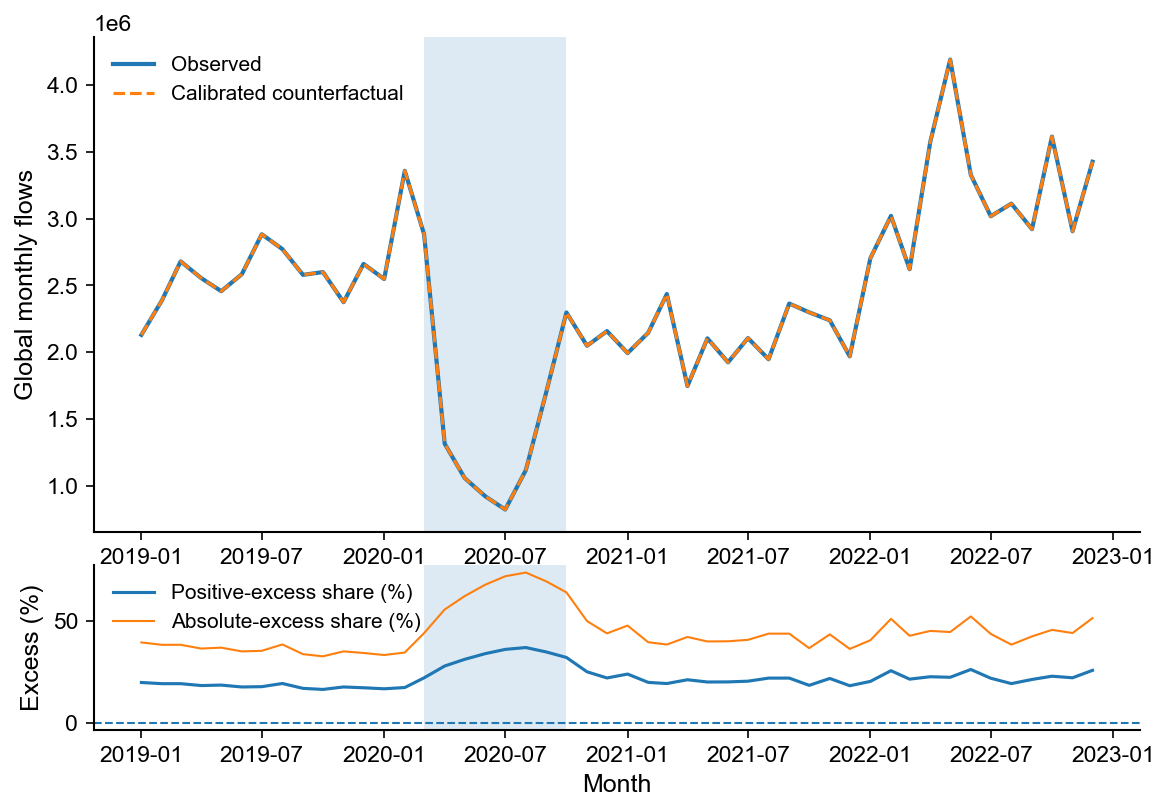

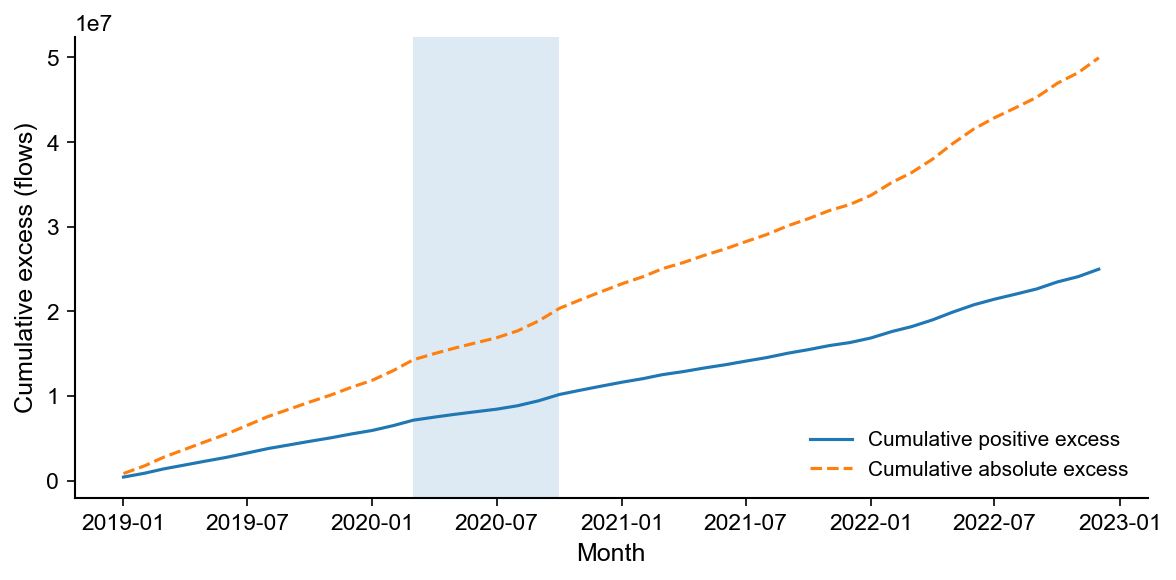

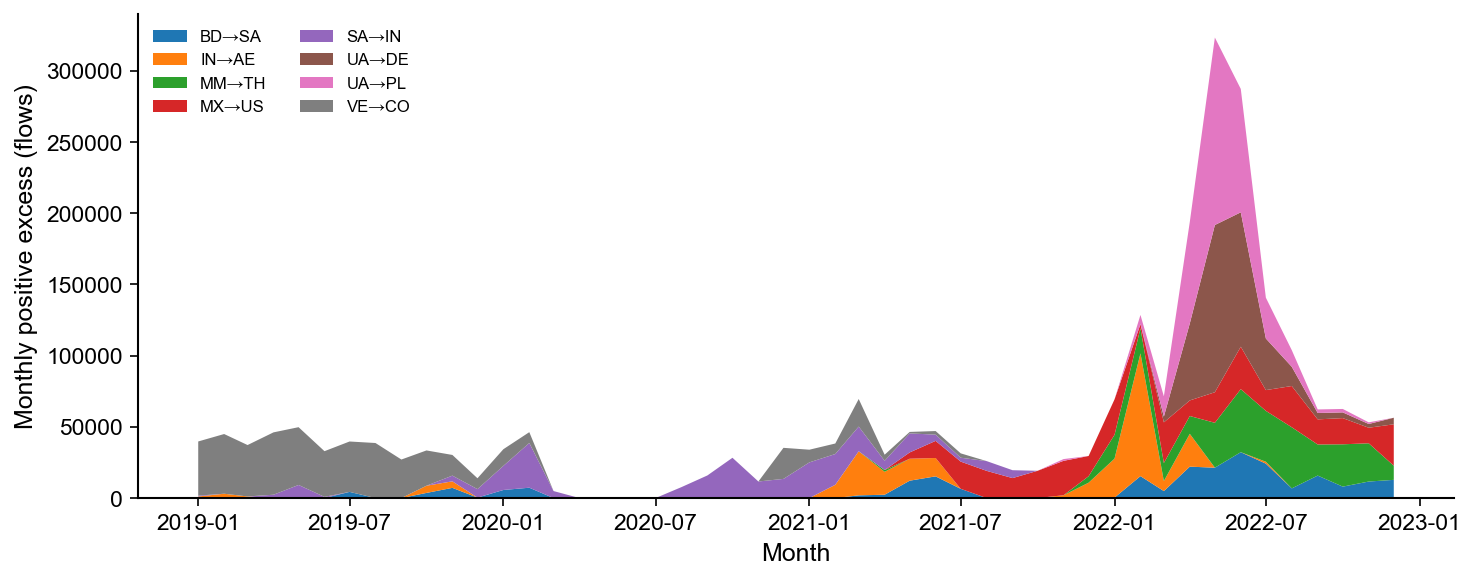

In [4]:
# 1) Build the calibrated frame and monthly aggregates
df_cal, G = build_global_series(pred)

# 2) Main two-panel global figure
plot_global_baseline_and_redistribution(G, covid_start="2020-03-01", covid_end="2020-10-01")

# 3) Optional extras
plot_cumulative_excess(G, covid_start="2020-03-01", covid_end="2020-10-01")
plot_topk_positive_excess(df_cal, k=8)

In [5]:
from CF_result import (compute_global_stats, 
        print_global_stats)

# ---- RUN ----
stats = compute_global_stats(G)     # uses your G from earlier
print_global_stats(stats)
# stats

=== Global redistribution metrics ===
Average positive-excess share: 22.2% (median 21.1%); peak 36.8% in 2020-08-01
Average absolute-excess share: 44.4% (median 42.1%); peak 73.6% in 2020-08-01

— COVID window —
Positive-excess share (mean): 31.7%; peak 36.8% in 2020-08-01
Absolute-excess share (mean): 63.4%; peak 73.6% in 2020-08-01

Cumulative totals (flows):
  Positive-excess: 25.0M (pre 7.1M, covid 3.7M, post 15.5M)
  Absolute-excess: 50.0M (pre 14.3M, covid 7.3M, post 31.1M)

Context: mean monthly global baseline size ≈ 2.4M


In [6]:
from CF_result import (metrics_for_global, 
        metrics_for_corridors)

# ------- EXAMPLE USAGE -------
# GLOBAL metrics:
global_metrics = metrics_for_global(df_cal)
global_metrics

NSE(R2_1to1)         1.000000e+00
RMSE                 1.680310e-10
NRMSE_mean           6.917794e-17
NRMSE_range          4.989257e-17
MAPE                 2.316682e-17
sMAPE                2.316682e-17
Pearson_r            1.000000e+00
CCC                  1.000000e+00
Delta_corr           1.000000e+00
Theil_U2_vs_naive    3.667273e-16
Name: GLOBAL, dtype: float64

In [7]:
# Corridor metrics (examples):
corr_set = [('FR','DE'), ('CA','US')]
corr_metrics = metrics_for_corridors(df_cal, corr_set)
corr_metrics

,NSE(R2_1to1),RMSE,NRMSE_mean,NRMSE_range,MAPE,sMAPE,Pearson_r,CCC,Delta_corr,Theil_U2_vs_naive,orig,dest
FR->DE,-0.007939,288.173636,0.330395,0.197650,0.261396,0.249510,0.430587,0.426465,0.663465,1.054679,FR,DE
CA->US,0.414593,1058.585433,0.254599,0.158637,0.183892,0.181528,0.671121,0.663600,0.637808,0.998858,CA,US


### Single Corridor

In [8]:
from CF_result import plot_pair_actual_vs_counterfactual

In [9]:
policies_CL = [
    ("2021-04-01", "Ley 21325 \nApril 2021", "red"),
    ("2021-03-01", "US Policy", "yellow")
]

policies_PE = [
    ("2019-07-15", "Visa Requirement\nJune 2019", "Red"),
    ("2021-03-01", "US Policy", "yellow"),
    ("2021-07-01", "Temporary Permit Carnet (CPT)\nJuly 2021", "green"),
    ("2021-10-22", "CPT Implementation\nOctober 2021", "red")
]

policies_EC = [
    ("2019-07-25", "Presidential Decree 826\nJuly 2019", "red"),
    ("2021-03-01", "US Policy", "yellow"),
    ("2019-08-26", "VIRTE\nBefore July 2019", "blue"),
    ("2022-06-01", "VIRTE\nSep 2022 to Aug 2023", "blue")
]
policies_US = [
    ("2021-03-01", "US Policy", "yellow")
]

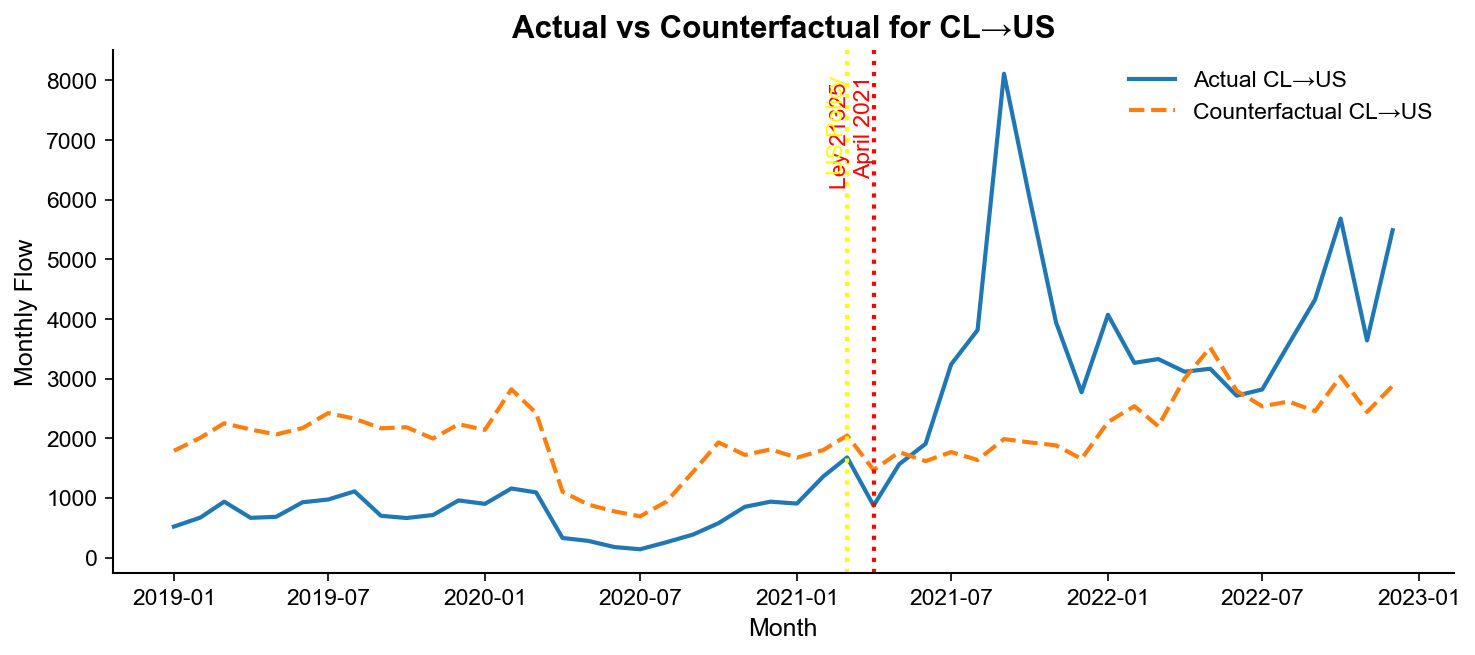

In [10]:
plot_pair_actual_vs_counterfactual(
    pred,
    orig="CL", dest="US",  
    policies=policies_CL,
    line_colors={"actual":"tab:blue", "counterfactual":"tab:orange"},
    yscale="linear"
)

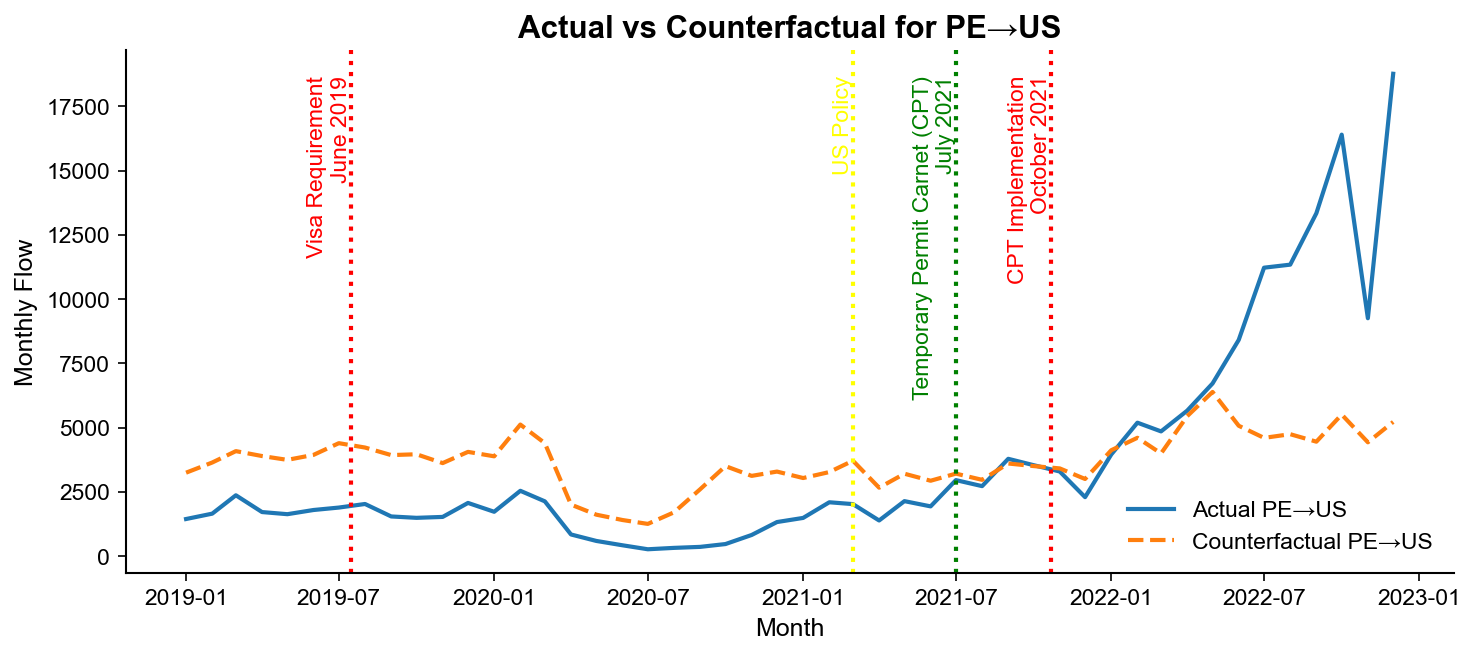

In [11]:
plot_pair_actual_vs_counterfactual(
    pred,
    orig="PE", dest="US",  
    policies=policies_PE,
    line_colors={"actual":"tab:blue", "counterfactual":"tab:orange"},
    yscale="linear"
)

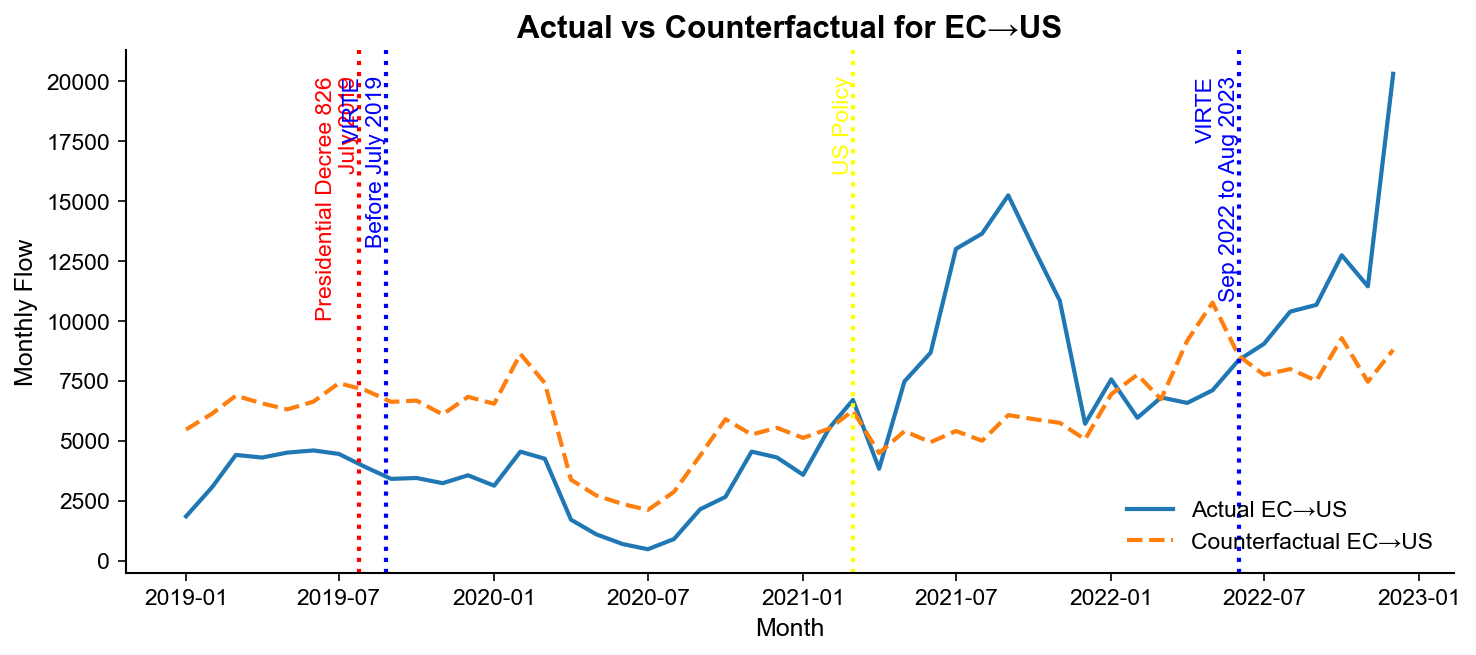

In [12]:
plot_pair_actual_vs_counterfactual(
    pred,
    orig="EC", dest="US",  
    policies=policies_EC,
    line_colors={"actual":"tab:blue", "counterfactual":"tab:orange"},
    yscale="linear"
)

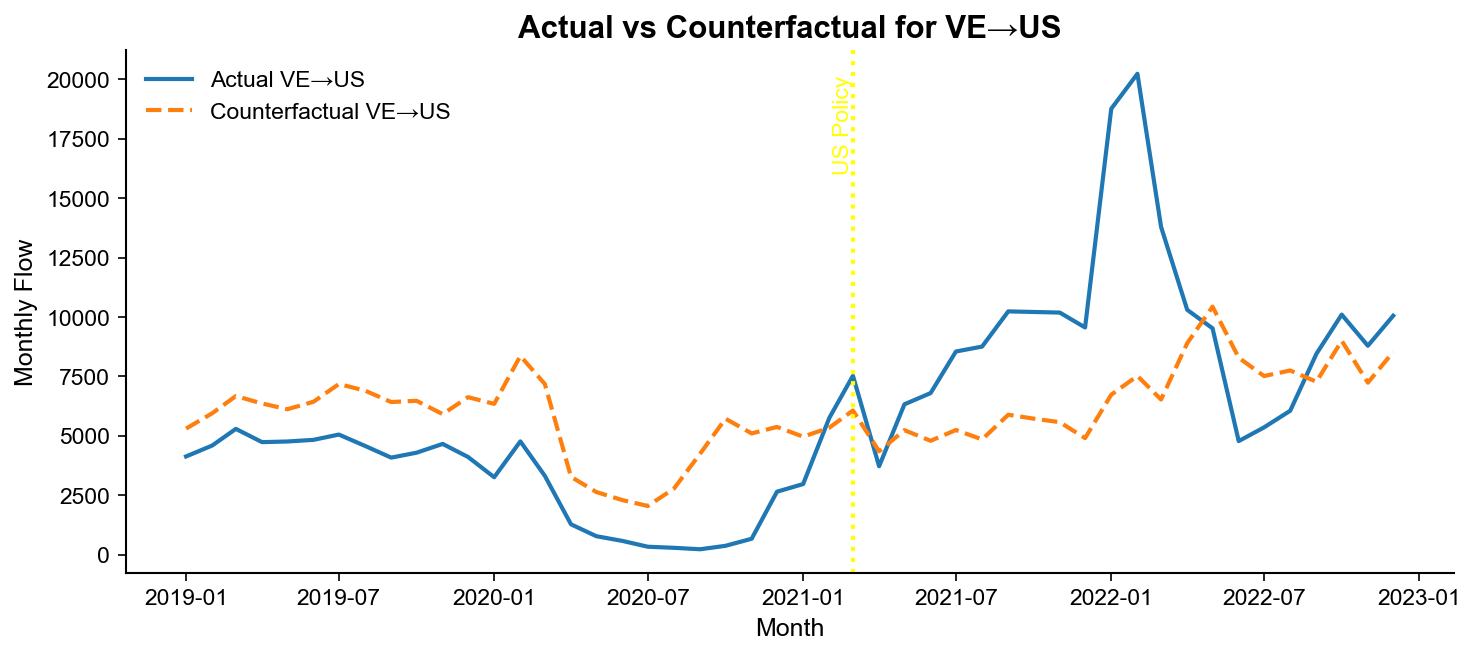

In [13]:
plot_pair_actual_vs_counterfactual(
    pred,
    orig="VE", dest="US", 
    line_colors={"actual":"tab:blue", "counterfactual":"tab:orange"},
    policies=policies_US,
    yscale="linear"
)

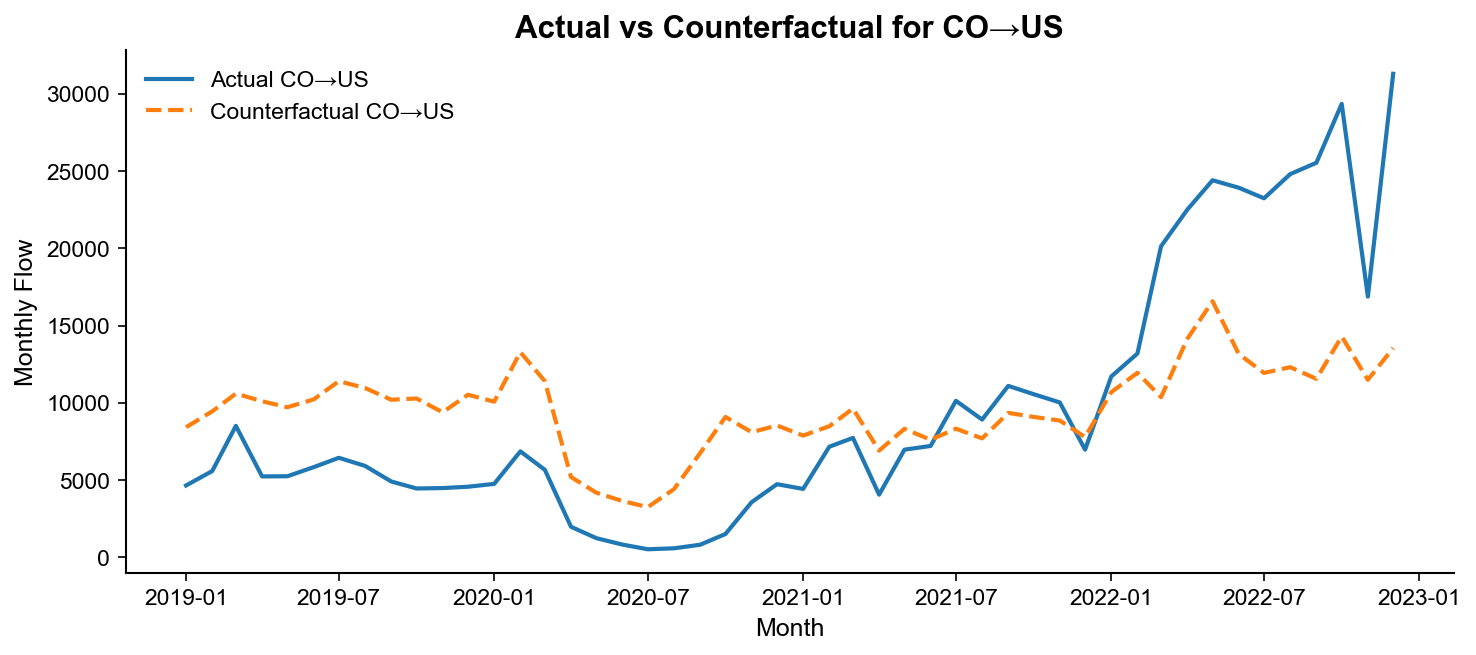

In [14]:
plot_pair_actual_vs_counterfactual(
    pred,
    orig="CO", dest="US", 
    # policies=[("2021-09-15","Policy A FAKE","tab:green")],
    line_colors={"actual":"tab:blue", "counterfactual":"tab:orange"},
    yscale="linear"
)